In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 20)
plt.style.use('ggplot')
%matplotlib inline
from copy import deepcopy
from sklearn import metrics

In [2]:
data = pd.read_csv('fbteamwins.csv')
print(data)

   season16  season17
0         3         5
1         3         4
2         2         8
3         2         3
4         6         2
5         6         4
6         7         3
7         7         4
8         8         5
9         7         6


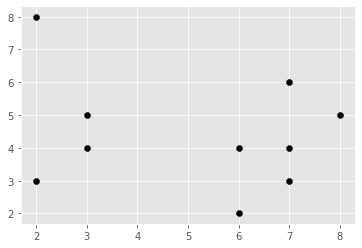

In [3]:
col1 = data['season16'].values
col2 = data['season17'].values
X = np.array(list(zip(col1, col2)))
plt.scatter(col1, col2, c='black')

In [4]:
k = 2
Centroids1x = [4,5]
Centroids1y = [6,4]
C = np.array(list(zip(Centroids1x, Centroids1y)), dtype=np.float32)

In [5]:
def manhattan(a, b, ax=1):
    return np.sum(np.abs(a-b), axis=ax)

def euclidean(a, b, ax=1):
    return np.sum((a-b)**2, axis=ax)

def cosine(a,b, ax=1):
    if a is None or b is None:
        return float('inf')
    return 1 - (np.dot(a[1:], b[1:])/(norm(a[1:])*norm(b[1:])))
#     val = sklearn.metrics.pairwise.cosine_similarity(a, b, dense_output=False)
#     val = 1- np.dot(a,b) /(np.linalg.norm(a))*np.sum(np.linalg.norm(b))
#     val.reshape(1, -1)
#     return 1-normalize(X.reshape(-1, X.shape[1]), axis=1).dot(normalize(p.reshape(-1, 1), axis=0))
#     return val

def jaccard(a, b, ax=1):
    return (1-np.sum(np.minimum(a,b),axis=ax)/np.sum(np.maximum(a,b),axis=ax))

distMetric = {"manhattan":0, "euclidean":1, "cosine":2, "jaccard":3}
metrics = {
        distMetric['manhattan']: manhattan,
        distMetric['euclidean']: euclidean,
        distMetric['cosine']: cosine,
        distMetric['jaccard']: jaccard
    }
def sse(X, clusters, C, metric=euclidean):
    sseVal = 0
    for i, centroid in enumerate(C):
        sseVal += np.sum(metric(X[np.where(clusters==i)], centroid))
    
    return sseVal

In [6]:
maxIT = 100

def kmeans(X, C = C, k=2, metric = distMetric['manhattan'], max_iter= maxIT):
    np.random.seed(99)
    
    if C is None:
        C = X[np.random.choice(len(X), size=k, replace=False)]
    C_old = np.ones(C.shape)
    clusters = np.zeros(len(X))
    
    metrics = {
        distMetric['manhattan']: manhattan,
        distMetric['euclidean']: euclidean,
        distMetric['cosine']: cosine,
        distMetric['jaccard']: jaccard
    }
    
    error = metrics[metric](C, C_old, None)
    error = np.array(error)
    count = 1
    prev_sse = 0
    curr_sse = 0
    while error.any() != 0:
        for i in range(len(X)):
            distances = metrics[metric](X[i], C)
            cluster = np.argmin([distances])
            clusters[i] = cluster
        C_old = deepcopy(C)
        curr_sse = sse(X, clusters, C)
        print('Iteration: {}'.format(count))
        print('Current SSE: {}'.format(curr_sse))
        print('Previous SSE: {}'.format(prev_sse))
        for i in range(k):
            points = [X[j] for j in range(len(X)) if clusters[j] == i]
            C[i] = np.mean(points, axis=0) 
        error_old = deepcopy(error)
        error = metrics[metric](C, C_old, None)
        if count>0:
            if np.sum(error_old) == np.sum(error):
                break
        if count>max_iter+1:
            break
        count = count+1
        prev_sse = curr_sse
    return clusters, count

# Q1.1

Iteration: 1
Current SSE: 58.0
Previous SSE: 0
Iteration: 2
Current SSE: 54.09523809523847
Previous SSE: 58.0
count: 3
clusters [0. 1. 0. 1. 1. 1. 1. 1. 1. 0.]


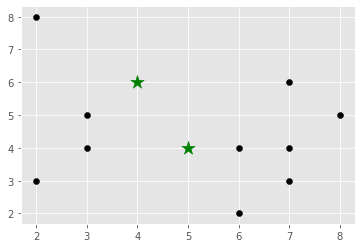

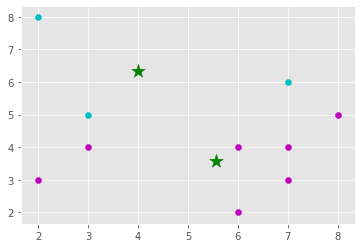

In [7]:
k = 2
Centroids1x = [4,5]
Centroids1y = [6,4]
Centroids1 = np.array(list(zip(Centroids1x, Centroids1y)), dtype=np.float32)
plt.scatter(col1, col2, c='black')
plt.scatter(Centroids1x, Centroids1y, marker='*', s=200, c ='g')

clusters, count = kmeans(X, C = C, k = 2, metric = distMetric['manhattan'], max_iter = 100)
print('count:', count)
print('clusters', clusters)
colors = ['c', 'm', 'y','b','g']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='g')

# Q1.2

Iteration: 1
Current SSE: 52.57142770858076
Previous SSE: 0
Iteration: 2
Current SSE: 32.70521512539767
Previous SSE: 52.57142770858076
Iteration: 3
Current SSE: 27.833333333333485
Previous SSE: 32.70521512539767
count: 4
clusters [0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]


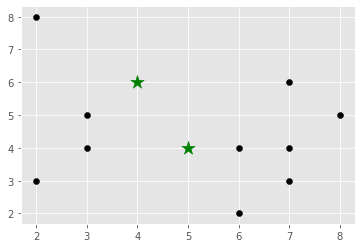

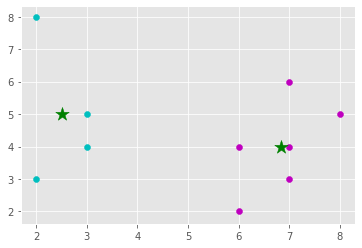

In [8]:
k = 2
Centroids1x = [4,5]
Centroids1y = [6,4]
Centroids1 = np.array(list(zip(Centroids1x, Centroids1y)), dtype=np.float32)
plt.scatter(col1, col2, c='black')
plt.scatter(Centroids1x, Centroids1y, marker='*', s=200, c ='g')

clusters, count = kmeans(X, C = C, k = 2, metric = distMetric['euclidean'], max_iter = 100)
print('count:', count)
print('clusters', clusters)
colors = ['c', 'm', 'y','b','g']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='g')

# Q1.3

Iteration: 1
Current SSE: 27.833333333333485
Previous SSE: 0
count: 2
clusters [0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]


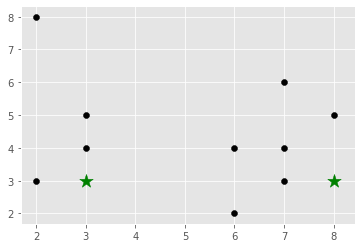

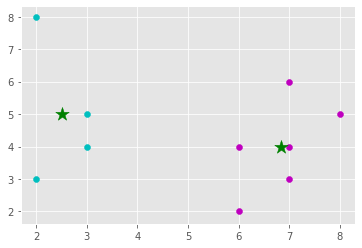

In [9]:
k = 2
Centroids1x = [3,8]
Centroids1y = [3,3]
Centroids1 = np.array(list(zip(Centroids1x, Centroids1y)), dtype=np.float32)
plt.scatter(col1, col2, c='black')
plt.scatter(Centroids1x, Centroids1y, marker='*', s=200, c ='g')

clusters, count = kmeans(X, C = C, k = 2, metric = distMetric['manhattan'], max_iter = 100)
print('count:', count)
print('clusters', clusters)
colors = ['c', 'm', 'y','b','g']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='g')

# Q1.4 

Iteration: 1
Current SSE: 27.833333333333485
Previous SSE: 0
count: 2
clusters [0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]


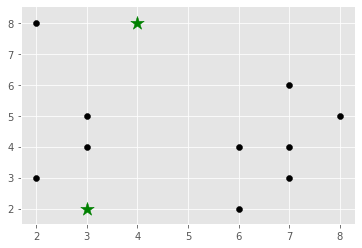

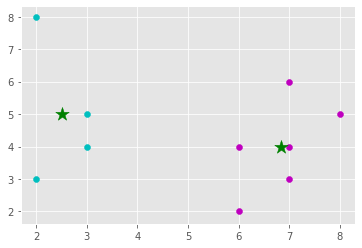

In [10]:
k = 2
Centroids1x = [3,4]
Centroids1y = [2,8]
Centroids1 = np.array(list(zip(Centroids1x, Centroids1y)), dtype=np.float32)
plt.scatter(col1, col2, c='black')
plt.scatter(Centroids1x, Centroids1y, marker='*', s=200, c ='g')

clusters, count = kmeans(X, C = C, k = 2, metric = distMetric['manhattan'], max_iter = 100)
print('count:', count)
print('clusters', clusters)
colors = ['c', 'm', 'y','b','g']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='g')

# Q2 Iris

In [11]:
df = pd.read_table("iris.data", sep=",", header=None, names=['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth', 'class'])

In [12]:
df['class'] = pd.Categorical(df['class'])
df['class'] = df['class'].cat.codes
df.head()

,sepalLength,sepalWidth,petalLength,petalWidth,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
X = df[df.columns[:-1]].values

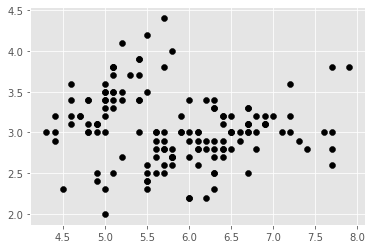

In [14]:
plt.scatter(X[:, 0], X[:, 1], c='black')

# Euclidean

In [15]:
clusters, count = kmeans(X, C=None, k=3, metric=distMetric['euclidean'], max_iter= maxIT)
print(count)

Iteration: 1
Current SSE: 133.26
Previous SSE: 0
Iteration: 2
Current SSE: 79.13199166666668
Previous SSE: 133.26
Iteration: 3
Current SSE: 78.940841426146
Previous SSE: 79.13199166666668
4


In [16]:
def predict(clusters, y, k=3):
    indexes = []
    for i in range(k):
        indexes.append(np.where(clusters == i))
    for cluster in indexes:
        mode = int(stats.mode(y[cluster])[0])
        clusters[cluster] = mode
    return clusters

In [17]:
from sklearn import metrics
from scipy import stats

pred_val = predict(clusters, df['class'].values)
metrics.accuracy_score(df['class'].values, pred_val)

0.8933333333333333

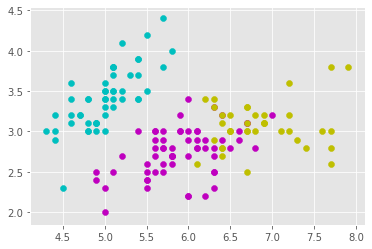

In [18]:
colors = ['c', 'm', 'y','b','g']
fig, ax = plt.subplots()
for i in range(3):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], c=colors[i])

# Cosine

In [ ]:
clusters, count = kmeans(X, C=None, k=3, metric=distMetric['cosine'], max_iter= maxIT)
print('count:',count)

In [ ]:
pred_val = predict(clusters, df['class'].values)
accuracy = metrics.accuracy_score(df['class'].values, clusters)
print(accuracy)

In [ ]:
colors = ['c', 'm', 'y','b','g']
fig, ax = plt.subplots()
for i in range(3):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], c=colors[i])

# Jaccard

In [20]:
clusters,count = kmeans(X, C=None, k=3, metric=distMetric['jaccard'], max_iter= maxIT)
print('count:',count)

Iteration: 1
Current SSE: 134.84
Previous SSE: 0
Iteration: 2
Current SSE: 80.52825766992748
Previous SSE: 134.84
Iteration: 3
Current SSE: 80.15236575181797
Previous SSE: 80.52825766992748
Iteration: 4
Current SSE: 79.69157708333331
Previous SSE: 80.15236575181797
Iteration: 5
Current SSE: 79.23624424524454
Previous SSE: 79.69157708333331
Iteration: 6
Current SSE: 79.18674974533107
Previous SSE: 79.23624424524454
count: 7


In [21]:
pred_val = predict(clusters, df['class'].values)
accuracy = metrics.accuracy_score(df['class'].values, clusters)
print(accuracy)

0.88


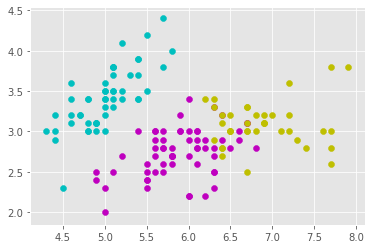

In [22]:
colors = ['c', 'm', 'y','b','g']
fig, ax = plt.subplots()
for i in range(3):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], c=colors[i])

Question 2 : Iris data
2.1]
SSE for Euclidean distance is lower by 1 point than jaccard

2.2]
K means gave better accuracy with euclidean distance , which is 0.8933 or 89.3% as compared to jaccard 88 %

2.3]
Jaccard required more iterations

2.4]
Increasing SSE value means that clusters are unable to form easily.